In [1]:
import pandas as pd
from pycaret.regression import *

df = pd.read_csv("BostonHousing.csv")
print(df.shape)
df.head()


(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


,Description,Value
0,Session id,42
1,Target,medv
2,Target type,Regression
3,Original data shape,"(506, 14)"
4,Transformed data shape,"(506, 14)"
5,Transformed train set shape,"(354, 14)"
6,Transformed test set shape,"(152, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.3180,11.9929,3.3328,0.8493,0.1447,0.1137,0.0480
gbr,Gradient Boosting Regressor,2.3357,12.1802,3.3811,0.8481,0.1516,0.1176,0.0470
xgboost,Extreme Gradient Boosting,2.5340,14.3012,3.6689,0.8260,0.1583,0.1233,0.0520
lightgbm,Light Gradient Boosting Machine,2.5279,14.5910,3.6653,0.8203,0.1578,0.1251,0.4610
rf,Random Forest Regressor,2.4835,14.3510,3.6154,0.8196,0.1543,0.1225,0.0750
ada,AdaBoost Regressor,2.8487,16.1280,3.9198,0.8020,0.1760,0.1461,0.0430
knn,K Neighbors Regressor,3.1788,24.4152,4.8953,0.7076,0.1871,0.1440,0.0120
br,Bayesian Ridge,3.5009,25.4462,4.9560,0.6892,0.2522,0.1733,0.0160
ridge,Ridge Regression,3.5228,25.5231,4.9663,0.6879,0.2559,0.1747,0.0100
lar,Least Angle Regression,3.5297,25.5507,4.9698,0.6875,0.2568,0.1751,0.0120


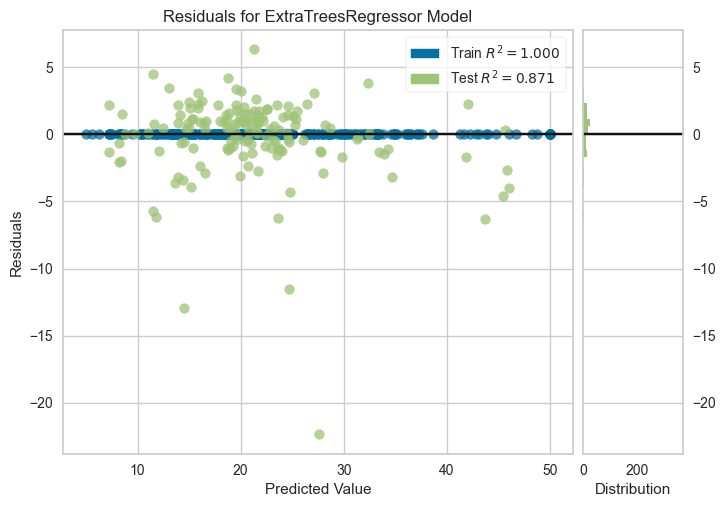

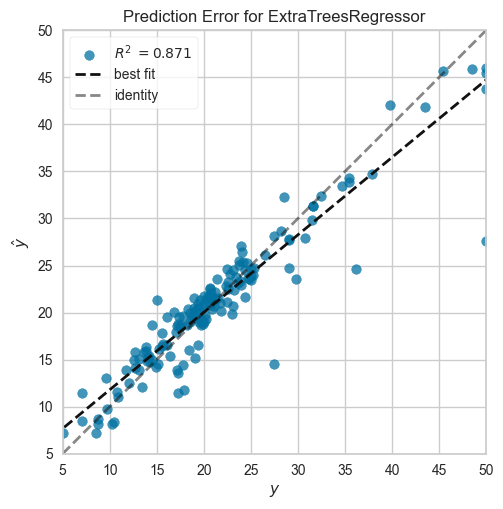

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['crim', 'zn', 'indus', 'chas',
                                              'nox', 'rm', 'age', 'dis', 'rad',
                                              'tax', 'ptratio', 'b', 'lstat'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('remove_multicollinearity',
                  TransformerWrapper(exclude=[],
                                     transformer=RemoveMulticollinearity(threshold=0.95))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('actual_estimator',
                  ExtraTreesRegressor(n_jobs=-1, random_state=42))]),
 'boston_regression_model.pkl')

In [2]:
s = setup(
    data=df,
    target="medv",  # target column = median house value
    session_id=42,
    normalize=True,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.95,
    use_gpu=False,  # Mac CPU; on Colab use True
)

best = compare_models()
plot_model(best, plot="residuals")
plot_model(best, plot="error")
final_model = finalize_model(best)
save_model(final_model, "boston_regression_model")
